In [2]:
import numpy as np
import pylab as pl

### Simulation parameter:
$D_{in}$: Cylinder unrestricted diffusivity<br>
$R$: Cylinder radius<br>
$D_{\parallel}$: Hindered parallel diffusivity<br>
$D_{\perp}$: Hindered perpendicular diffusivity<br>
$f_{in}$: Cylinder compartement volume fraction<br>
$f_{csf}$: CSF compartement volume fraction

implicit parameter:<br>
$D_{csf}$: CSF diffusivity<br>
$f_{hind}$: Hindered compartement volume fraction

### Parameters Range:
$D_{in} \in [1, 3] \times 10^{-9} m^2/s$<br>
$R \in [0.1, 5] \times 10^{-6} m$<br>
$D_{\parallel} \in [1, 3] \times 10^{-9} m^2/s$<br>
$D_{\perp} \in [0.1, 2] \times 10^{-9} m^2/s$<br>
$f_{in} \in [0, 1]$<br>
$f_{csf} \in [0, 1]$

with:<br>
$D_{\perp} < D_{\parallel}$<br>
$f_{in} + f_{csf} \le 1$

and:<br>
$D_{csf} = 3.1 \times 10^{-9} m^2/s$<br>
$f_{hind} = 1 - (f_{in} + f_{csf})$

### Acquisition parameter:
Same as Alfred and Assaf ISMRM abstract<br>
86 directions over 5 shell times 3 ($\Delta, \delta$):<br>
$b \in [500, 1000, 2000, 3000, 4000, 5000]\,s/mm^2$<bv>
$(\Delta, \delta, G_{\max}) = (16, 9, 259), (28, 7, 240), (40, 6, 230) \,(ms, ms, mT/m)$

In [44]:
# load simulation parameter
params = np.load('data/TheParam.npy')
todel = np.load('data/todel.npy')
todel = np.array(todel).astype(np.bool)

In [45]:
params.shape

(3024450, 6)

In [46]:
todel.sum()

2066786

In [47]:
# filtering duplicate (ex: cases where fin = 0 and we are varying Din)
params = params[todel]

In [48]:
params.shape

(2066786, 6)

In [49]:
# load fitted AxCaliber3D param
frac_rest = np.load('data/fR.npy')[todel]
frac_hind = np.load('data/fH.npy')[todel]
frac_csf = np.load('data/fCSF.npy')[todel]
beta1 = np.load('data/beta1.npy')[todel]
beta2 = np.load('data/beta2.npy')[todel]
mean_rad = np.load('data/mean_rad.npy')[todel]
residuals = np.load('data/res_map.npy')[todel]
nmse = np.load('data/nmse_map.npy')[todel]
total_frac = np.load('data/total_frac.npy')[todel]

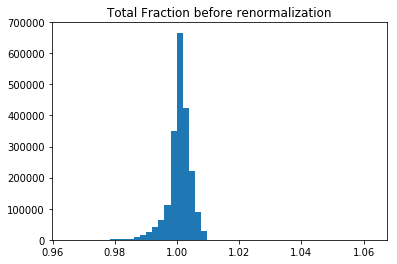

In [50]:
# quick look at the distribution
_ = pl.hist(total_frac, bins=50)
_ = pl.title('Total Fraction before renormalization')

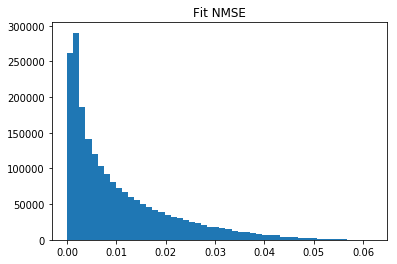

In [51]:
_ = pl.hist(nmse, bins=50)
_ = pl.title('Fit NMSE')

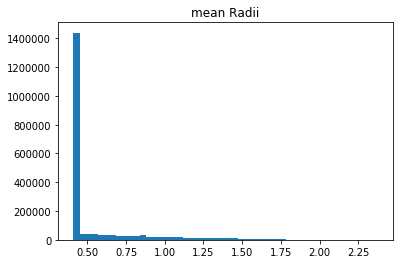

In [52]:
_ = pl.hist(mean_rad, bins=50)
_ = pl.title('mean Radii')

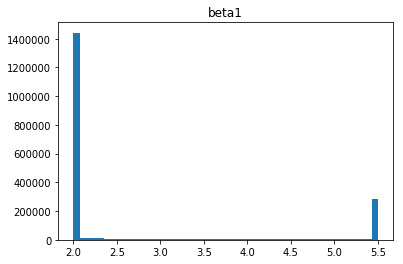

In [53]:
_ = pl.hist(beta1, bins=50)
_ = pl.title('beta1')

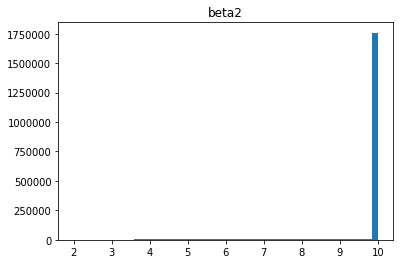

In [54]:
_ = pl.hist(beta2, bins=50)
_ = pl.title('beta2')

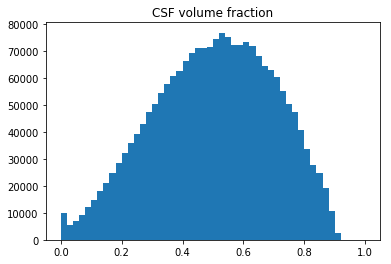

In [55]:
_ = pl.hist(frac_csf, bins=50)
_ = pl.title('CSF volume fraction')

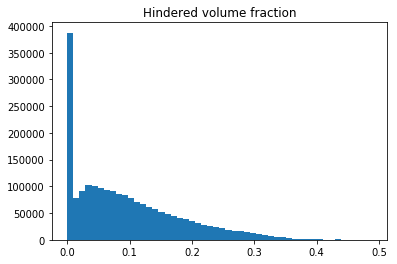

In [56]:
_ = pl.hist(frac_hind, bins=50)
_ = pl.title('Hindered volume fraction')

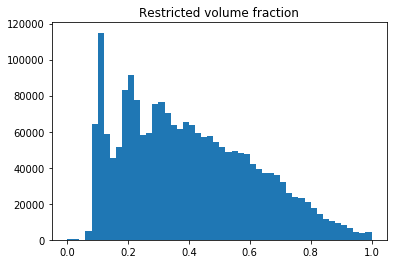

In [57]:
_ = pl.hist(frac_rest, bins=50)
_ = pl.title('Restricted volume fraction')

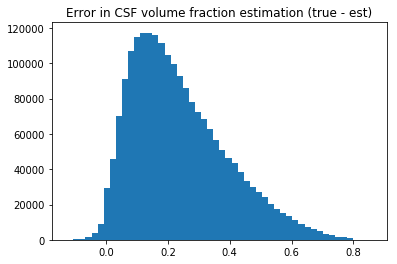

In [58]:
frac_csf_sim = params[:, 5]
frac_csf_err = frac_csf - frac_csf_sim 
_ = pl.hist(frac_csf_err, bins=50)
_ = pl.title('Error in CSF volume fraction estimation (true - est)')

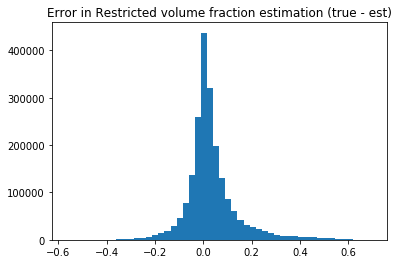

In [59]:
frac_rest_sim = params[:, 4]
frac_rest_err = frac_rest - frac_rest_sim 
_ = pl.hist(frac_rest_err, bins=50)
_ = pl.title('Error in Restricted volume fraction estimation (true - est)')

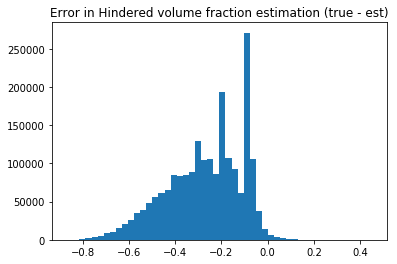

In [60]:
frac_hind_sim = 1 - (params[:, 4]+params[:, 5])
frac_hind_err = frac_hind - frac_hind_sim 
_ = pl.hist(frac_hind_err, bins=50)
_ = pl.title('Error in Hindered volume fraction estimation (true - est)')

In [61]:
from scipy.stats.stats import pearsonr

In [68]:
pearsonr(frac_csf, frac_csf_sim)

(0.7325320144289791, 0.0)

In [69]:
pearsonr(frac_hind, frac_hind_sim)

(0.7895025900465557, 0.0)

In [70]:
pearsonr(frac_rest, frac_rest_sim)

(0.8766879824700003, 0.0)